<a href="https://colab.research.google.com/github/nivaslinga2/Telecome_usage-EDA/blob/main/Team_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#structure overview
df=pd.read_csv('/content/telecom_usage_mixed (1).csv')
df.head()
df.tail()


,monthly_minutes,user_id,monthly_data_mb,monthly_sms,monthly_data_mb_dup,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
252,620.0,U70245,1942.0,131.0,1942.0,16.0,0.0,Basc,No,1.0
253,unknown,U70013,3207.0,424.0,3207.0,9.0,0.0,STANDARD,YES,0.0
254,725.0,U70153,2405.0,458.0,2405.0,30.0,0.0,Unlimited,YES,0.0
255,NaN,U70241,541.0,312.0,541.0,31.0,NaN,Basic,No,3.0
256,1169.0,U70161,1254.0,33.0,1254.0,23.0,0.0,Standard,Ye,0.0


In [18]:
df.info()
df.shape
df.size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   monthly_minutes      244 non-null    object 
 1   user_id              245 non-null    object 
 2   monthly_data_mb      236 non-null    float64
 3   monthly_sms          240 non-null    float64
 4   monthly_data_mb_dup  236 non-null    float64
 5   contract_months      248 non-null    float64
 6   churn_next_month     241 non-null    float64
 7   plan_type            232 non-null    object 
 8   has_family_plan      236 non-null    object 
 9   overdue_payments     242 non-null    float64
dtypes: float64(6), object(4)
memory usage: 20.2+ KB


2570

In [19]:
df.describe()

,monthly_data_mb,monthly_sms,monthly_data_mb_dup,contract_months,churn_next_month,overdue_payments
count,236.000000,240.000000,236.000000,248.000000,241.000000,242.000000
mean,1992.322034,265.908333,1992.322034,17.568548,0.078838,1.376033
std,2147.543201,146.636829,2147.543201,10.116494,0.270047,1.087044
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,392.500000,144.500000,392.500000,9.000000,0.000000,0.000000
50%,1385.500000,298.000000,1385.500000,17.000000,0.000000,1.000000
75%,2619.500000,399.000000,2619.500000,26.250000,0.000000,2.000000
max,14873.000000,498.000000,14873.000000,35.000000,1.000000,3.000000


In [16]:
#check-missing values
df.isnull().sum()

,0
monthly_minutes,13
user_id,12
monthly_data_mb,21
monthly_sms,17
monthly_data_mb_dup,21
contract_months,9
churn_next_month,16
plan_type,25
has_family_plan,21
overdue_payments,15


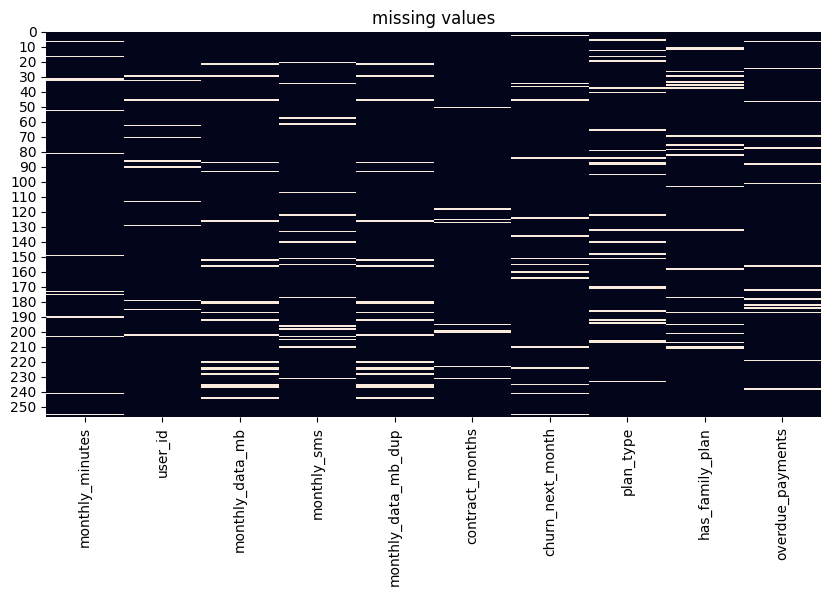

In [17]:
# visualization of missing data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.title('missing values')
plt.show()

In [24]:
# duplicates checking
df.duplicated().sum()
#removing of duplicates
df.drop_duplicates(inplace=True)



In [30]:
df.head()

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,monthly_data_mb_dup,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,U70000,1213.0,15.0,1213.0,17.0,0.0,Basic,No,1.0
1,1041.0,U70001,1215.0,12.0,1215.0,14.0,1.0,UNLIMITED,No,2.0
2,1182.0,U70002,1546.0,199.0,1546.0,3.0,NaN,BASIC,Yes,2.0
3,1281.0,U70003,2014.0,183.0,2014.0,33.0,0.0,Basic,No,0.0
4,1482.0,U70004,6308.0,308.0,6308.0,16.0,0.0,Standard,N,1.0


In [29]:
#duplicate columns
df.columns[df.columns.duplicated()]


Index([], dtype='object')

In [25]:
#total unique values
df.nunique()

,0
monthly_minutes,208
user_id,238
monthly_data_mb,219
monthly_sms,186
monthly_data_mb_dup,219
contract_months,36
churn_next_month,2
plan_type,23
has_family_plan,9
overdue_payments,4


In [74]:
#monthly_minutes unique values
df['monthly_minutes'].unique()

array(['1351.0', '1041.0', '1182.0', '1281.0', '1482.0', '1430.0', nan,
       '876.0', '606.0', '1166.0', '881.0', '600.0', '1128.0', '638.0',
       '597.0', '1205.0', '1555.0', '944.0', '972.0', '917.0', '933.0',
       '767.0', '1415.0', '1059.0', '1019.0', '932.0', '618.0', '1282.0',
       '1213.0', '1259.0', '1385.0', '1362.0', '1791.0', '1120.0',
       '1298.0', '1004.0', '759.0', '1212.0', '1103.0', '502.0', '565.0',
       '1230.0', '890.0', '1107.0', '1145.0', '966.0', '1177.0', '1144.0',
       '760.0', '996.0', '682.0', '1154.0', '860.0', '1216.0', '928.0',
       '1343.0', '1400.0', '1133.0', '719.0', '1288.0', '980.0', '1014.0',
       '883.0', '585.0', '1322.0', '975.0', '441.0', '959.0', '594.0',
       '1136.0', '1452.0', '1431.0', '1156.0', '590.0', '1548.0', '963.0',
       '643.0', '1312.0', '673.0', '1347.0', '942.0', '895.0', '610.0',
       '687.0', '1048.0', '508.0', '1207.0', '843.0', '1175.0', '939.0',
       '1369.0', '385.0', '1240.0', '1007.0', '803.0', '

In [56]:
#user_id unique values
df['user_id'].unique()

array(['U70000', 'U70001', 'U70002', 'U70003', 'U70004', 'U70005',
       'U70006', 'U70007', 'U70008', 'U70009', 'U70010', 'U70011',
       'U70012', 'U70013', 'U70014', 'U70015', 'U70016', 'U70017',
       'U70018', 'U70019', 'U70020', 'U70021', 'U70022', 'U70023',
       'U70024', 'U70025', 'U70026', 'U70027', 'U70028', nan, 'U70030',
       'U70031', 'U70033', 'U70034', 'U70035', 'U70036', 'U70037',
       'U70038', 'U70039', 'U70040', 'U70041', 'U70042', 'U70043',
       'U70044', 'U70046', 'U70047', 'U70048', 'U70049', 'U70050',
       'U70051', 'U70052', 'U70053', 'U70054', 'U70055', 'U70056',
       'U70057', 'U70058', 'U70059', 'U70060', 'U70061', 'U70063',
       'U70064', 'U70065', 'U70066', 'U70067', 'U70068', 'U70069',
       'U70071', 'U70072', 'U70073', 'U70074', 'U70075', 'U70076',
       'U70077', 'U70078', 'U70079', 'U70080', 'U70081', 'U70082',
       'U70083', 'U70084', 'U70085', 'U70087', 'U70088', 'U70089',
       'U70091', 'U70092', 'U70093', 'U70094', 'U70095', 

In [57]:
#monthly_data_mb unique values
df['monthly_data_mb'].unique()

array([ 1213.,  1215.,  1546.,  2014.,  6308.,  2112.,  4304.,  1625.,
        1972.,   145.,   286.,  1733.,  1007.,  3207.,  1567.,  4279.,
        7175.,   319.,  1004.,  2187.,   729.,    nan,  3361.,  7862.,
        2973.,  1483.,  1169.,  1552.,  1243.,   455.,  4681.,  2809.,
        2285.,  5988.,   669.,   169.,  3499., 12897.,  1728.,   121.,
        3033.,   153.,  1553.,   650.,  1201.,  4575.,   711.,   980.,
        5879.,   450.,   984.,  2976.,   277.,  1150.,  2401.,  1045.,
        2442.,  1399.,    23.,  1897.,  5048.,   235.,  1786.,  2609.,
         147.,    46.,  1248.,  3133.,   350.,  3624.,  2138.,   807.,
        1451.,  6738.,   488.,  1384.,  1959.,   297.,    89.,    27.,
         785.,   154.,  3257.,   127.,  1134.,    52.,   288.,   780.,
        5620.,  1008.,  1371.,   564.,     0.,  4592.,   170.,  6662.,
         280.,  1857., 14873.,   298.,  1103.,  3032.,    65.,  2341.,
         168.,   540.,   349.,  4758.,   398.,    83.,  1772.,   850.,
      

In [58]:
#unique values in monthly_sms
df['monthly_sms'].unique()

array([ 15.,  12., 199., 183., 308., 303., 280., 321., 157., 359., 258.,
       406., 156., 424.,  93., 266.,  20., 126., 346., 407.,  nan, 350.,
       349., 448., 384., 437., 455., 111., 233.,  33.,  79., 474., 451.,
        82., 488., 130.,  10., 391.,  61., 358.,  32., 135., 408.,  87.,
       409.,  16.,  90., 412., 298., 486., 252.,  72., 205., 260., 177.,
       311., 446., 312., 172., 164., 327., 334., 219., 291., 160., 389.,
       247., 370., 459.,  70., 428.,  91., 390., 360., 320., 244.,  23.,
        44., 188., 402., 372., 415., 285., 440., 403., 340., 221., 369.,
       475., 351., 413., 342., 218., 484., 442., 217., 189.,  66.,  30.,
        53.,   9., 165., 338., 414., 284., 152.,  31., 300., 304., 145.,
       378., 123.,  51., 140., 426.,  83., 242., 354.,   5., 454., 220.,
        86., 179., 452., 341., 392., 245., 457., 173., 490., 458., 236.,
       186., 254., 301., 399., 422., 256., 481., 232., 214., 241.,  19.,
       209., 425., 487., 468.,  71., 161., 362., 49

In [59]:
#contract_months duplicates
df['contract_months'].unique()


array([17., 14.,  3., 33., 16.,  6., 31., 22., 19.,  1., 20., 11., 26.,
        9.,  7., 21., 12.,  8., 29.,  5., 24., 27., 28., 35., 10., 25.,
       34., nan, 30.,  2.,  4.,  0., 18., 15., 23., 32., 13.])

In [60]:
#churn_next_month duplicates
df['churn_next_month'].unique()

array([ 0.,  1., nan])

In [61]:
#plan_type duplicates
df['plan_type'].unique()

array(['Basic', 'UNLIMITED', 'BASIC', 'Standard', nan, 'STANDARD', 'Bsic',
       'Unlimited', 'Basi', 'Basc', 'Standrd', 'Unliited', 'nlimited',
       'Ulimited', 'Standar', 'Unimited', 'Unlimitd', 'Stndard', 'Baic',
       'Unlmited', 'Sandard', 'tandard', 'asic', 'Stadard'], dtype=object)

In [62]:
#replace duplicates in plan_type


df["plan_type"] = df["plan_type"].str.lower()

# Remove extra spaces
df["plan_type"] = df["plan_type"].str.strip()

# Fix common typos
df["plan_type"] = df["plan_type"].replace("baisc", "basic")
df["plan_type"] = df["plan_type"].replace("basic ", "basic")
df["plan_type"] = df["plan_type"].replace("standrd", "standard")
df["plan_type"] = df["plan_type"].replace("std", "standard")
df["plan_type"] = df["plan_type"].replace("unlimitd", "unlimited")
df["plan_type"] = df["plan_type"].replace("unlimted", "unlimited")
df["plan_type"] = df["plan_type"].replace("unlim", "unlimited")
df["plan_type"] = df["plan_type"].replace("unltd", "unlimited")
df["plan_type"] = df["plan_type"].replace("premium+", "premium")
df["plan_type"] = df["plan_type"].replace("prem", "premium")
df["plan_type"] = df["plan_type"].replace("advance", "advanced")
df["plan_type"] = df["plan_type"].replace("adv", "advanced")

# Replace anything unknown with "other"
valid_plans = ["basic", "standard", "unlimited", "premium", "advanced"]
df.loc[~df["plan_type"].isin(valid_plans), "plan_type"] = "other"

# Check result
print(df["plan_type"].value_counts())

plan_type
other        69
standard     67
basic        64
unlimited    57
Name: count, dtype: int64


In [63]:
df.head()

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,monthly_data_mb_dup,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,U70000,1213.0,15.0,1213.0,17.0,0.0,basic,No,1.0
1,1041.0,U70001,1215.0,12.0,1215.0,14.0,1.0,unlimited,No,2.0
2,1182.0,U70002,1546.0,199.0,1546.0,3.0,NaN,basic,Yes,2.0
3,1281.0,U70003,2014.0,183.0,2014.0,33.0,0.0,basic,No,0.0
4,1482.0,U70004,6308.0,308.0,6308.0,16.0,0.0,standard,N,1.0


In [64]:
#has_family_plan unique values
df['has_family_plan'].unique()


array(['No', 'Yes', 'N', 'es', 'o', 'YES', nan, 'NO', 'Ys', 'Ye'],
      dtype=object)

In [65]:
#replace unique values

df["has_family_plan"] = df["has_family_plan"].str.lower()

# Remove extra spaces
df["has_family_plan"] = df["has_family_plan"].str.strip()

# Fix common variations
df["has_family_plan"] = df["has_family_plan"].replace("y", "yes")
df["has_family_plan"] = df["has_family_plan"].replace("1", "yes")
df["has_family_plan"] = df["has_family_plan"].replace("n", "no")
df["has_family_plan"] = df["has_family_plan"].replace("0", "no")

# Replace anything else with "no" (default)
df.loc[~df["has_family_plan"].isin(["yes", "no"]), "has_family_plan"] = "no"

# Check result
print(df["has_family_plan"].value_counts())

has_family_plan
no     182
yes     75
Name: count, dtype: int64


In [66]:
df.head()

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,monthly_data_mb_dup,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,U70000,1213.0,15.0,1213.0,17.0,0.0,basic,no,1.0
1,1041.0,U70001,1215.0,12.0,1215.0,14.0,1.0,unlimited,no,2.0
2,1182.0,U70002,1546.0,199.0,1546.0,3.0,NaN,basic,yes,2.0
3,1281.0,U70003,2014.0,183.0,2014.0,33.0,0.0,basic,no,0.0
4,1482.0,U70004,6308.0,308.0,6308.0,16.0,0.0,standard,no,1.0


In [67]:
#unique values in overdue_payments
df['overdue_payments'].unique()

array([ 1.,  2.,  0.,  3., nan])

In [68]:
#duplicate coloum droping
df = df.drop(columns=["monthly_data_mb_dup"], errors="ignore")

In [69]:
df.head()

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,U70000,1213.0,15.0,17.0,0.0,basic,no,1.0
1,1041.0,U70001,1215.0,12.0,14.0,1.0,unlimited,no,2.0
2,1182.0,U70002,1546.0,199.0,3.0,NaN,basic,yes,2.0
3,1281.0,U70003,2014.0,183.0,33.0,0.0,basic,no,0.0
4,1482.0,U70004,6308.0,308.0,16.0,0.0,standard,no,1.0


In [78]:
#relacing unknown with Nan
df = df.replace(["unknown", "UNKNOWN"], np.nan)
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
df["monthly_minutes"] = pd.to_numeric(df["monthly_minutes"], errors="coerce")



/tmp/ipython-input-2392635530.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [72]:
df['monthly_minutes'].unique()

array(['1351.0', '1041.0', '1182.0', '1281.0', '1482.0', '1430.0', nan,
       '876.0', '606.0', '1166.0', '881.0', '600.0', '1128.0', '638.0',
       '597.0', '1205.0', '1555.0', '944.0', '972.0', '917.0', '933.0',
       '767.0', '1415.0', '1059.0', '1019.0', '932.0', '618.0', '1282.0',
       '1213.0', '1259.0', '1385.0', '1362.0', '1791.0', '1120.0',
       '1298.0', '1004.0', '759.0', '1212.0', '1103.0', '502.0', '565.0',
       '1230.0', '890.0', '1107.0', '1145.0', '966.0', '1177.0', '1144.0',
       '760.0', '996.0', '682.0', '1154.0', '860.0', '1216.0', '928.0',
       '1343.0', '1400.0', '1133.0', '719.0', '1288.0', '980.0', '1014.0',
       '883.0', '585.0', '1322.0', '975.0', '441.0', '959.0', '594.0',
       '1136.0', '1452.0', '1431.0', '1156.0', '590.0', '1548.0', '963.0',
       '643.0', '1312.0', '673.0', '1347.0', '942.0', '895.0', '610.0',
       '687.0', '1048.0', '508.0', '1207.0', '843.0', '1175.0', '939.0',
       '1369.0', '385.0', '1240.0', '1007.0', '803.0', '

In [73]:
df.nunique()

,0
monthly_minutes,207
user_id,238
monthly_data_mb,219
monthly_sms,186
contract_months,36
churn_next_month,2
plan_type,4
has_family_plan,2
overdue_payments,4


In [79]:
#monthly_minutes- nan replace
df["monthly_minutes"].fillna(df["monthly_minutes"].median(), inplace=True)

/tmp/ipython-input-2265980725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_minutes"].fillna(df["monthly_minutes"].median(), inplace=True)


In [80]:
#monthly_data_mb- nan replace
df["monthly_data_mb"].fillna(df["monthly_data_mb"].median(), inplace=True)

/tmp/ipython-input-2943337186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_data_mb"].fillna(df["monthly_data_mb"].median(), inplace=True)


In [87]:
df["monthly_sms"].fillna(df["monthly_sms"].median(), inplace=True)
df["contract_months"].fillna(df["contract_months"].median(), inplace=True)
df["churn_next_month"].fillna(df["churn_next_month"].median(), inplace=True)
df["overdue_payments"].fillna(df["overdue_payments"].median(), inplace=True)

/tmp/ipython-input-997056885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_sms"].fillna(df["monthly_sms"].median(), inplace=True)
/tmp/ipython-input-997056885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [98]:
df["user_id"].fillna(df["user_id"].mode()[0], inplace=True)

In [99]:
df.head(30)

,monthly_minutes,user_id,monthly_data_mb,monthly_sms,contract_months,churn_next_month,plan_type,has_family_plan,overdue_payments
0,1351.0,u70000,1213.0,15.0,17.0,0.0,basic,no,1.0
1,1041.0,u70001,1215.0,12.0,14.0,1.0,unlimited,no,2.0
2,1182.0,u70002,1546.0,199.0,3.0,0.0,basic,yes,2.0
3,1281.0,u70003,2014.0,183.0,33.0,0.0,basic,no,0.0
4,1482.0,u70004,6308.0,308.0,16.0,0.0,standard,no,1.0
5,1430.0,u70005,2112.0,303.0,6.0,0.0,other,no,3.0
6,1056.0,u70006,4304.0,280.0,31.0,0.0,standard,no,1.0
7,876.0,u70007,1625.0,321.0,22.0,0.0,other,no,2.0
8,606.0,u70008,1972.0,157.0,19.0,0.0,unlimited,no,2.0
9,1056.0,u70009,145.0,359.0,1.0,0.0,basic,yes,2.0


In [101]:
# Forward and backward fill for each column

df["monthly_minutes"].ffill(inplace=True)
df["monthly_minutes"].bfill(inplace=True)

df["user_id"].ffill(inplace=True)
df["user_id"].bfill(inplace=True)

df["monthly_data_mb"].ffill(inplace=True)
df["monthly_data_mb"].bfill(inplace=True)

df["monthly_sms"].ffill(inplace=True)
df["monthly_sms"].bfill(inplace=True)

df["contract_months"].ffill(inplace=True)
df["contract_months"].bfill(inplace=True)

df["churn_next_month"].ffill(inplace=True)
df["churn_next_month"].bfill(inplace=True)

df["plan_type"].ffill(inplace=True)
df["plan_type"].bfill(inplace=True)

df["has_family_plan"].ffill(inplace=True)
df["has_family_plan"].bfill(inplace=True)

df["overdue_payments"].ffill(inplace=True)
df["overdue_payments"].bfill(inplace=True)

/tmp/ipython-input-3941007038.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["monthly_minutes"].ffill(inplace=True)
/tmp/ipython-input-3941007038.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [102]:
df.isnull().sum()

,0
monthly_minutes,0
user_id,0
monthly_data_mb,0
monthly_sms,0
contract_months,0
churn_next_month,0
plan_type,0
has_family_plan,0
overdue_payments,0


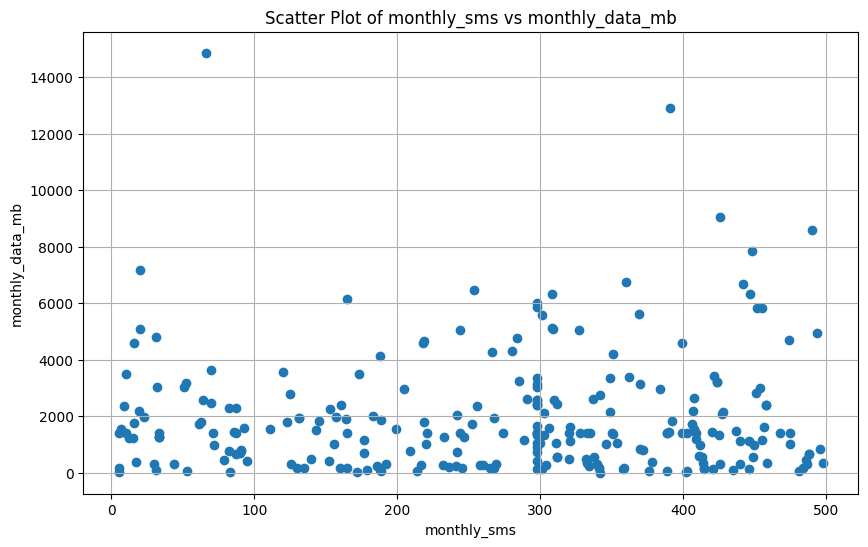

In [109]:
#visualization of data using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['monthly_sms'], df['monthly_data_mb'])
plt.title('Scatter Plot of monthly_sms vs monthly_data_mb')
plt.xlabel('monthly_sms')
plt.ylabel('monthly_data_mb')
plt.grid(True)

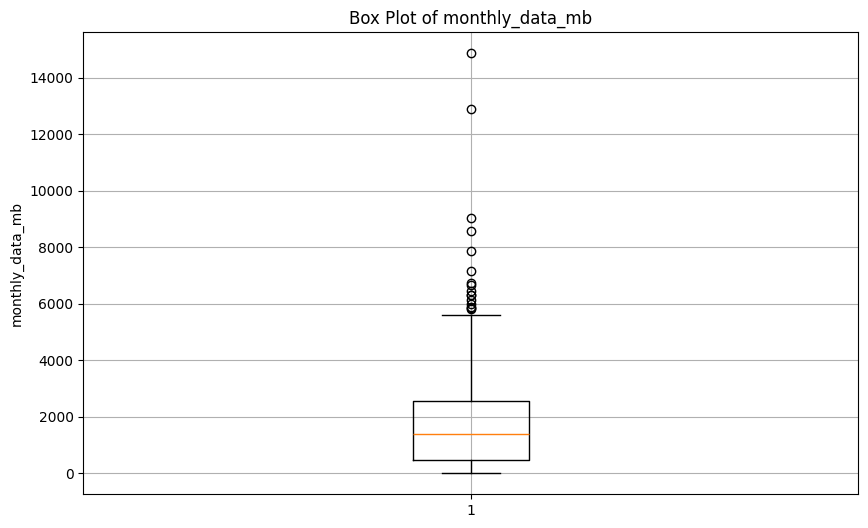

In [107]:
#visualization of data using box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['monthly_data_mb'])
plt.title('Box Plot of monthly_data_mb')
plt.ylabel('monthly_data_mb')
plt.grid(True)


Text(0, 0.5, 'Frequency')

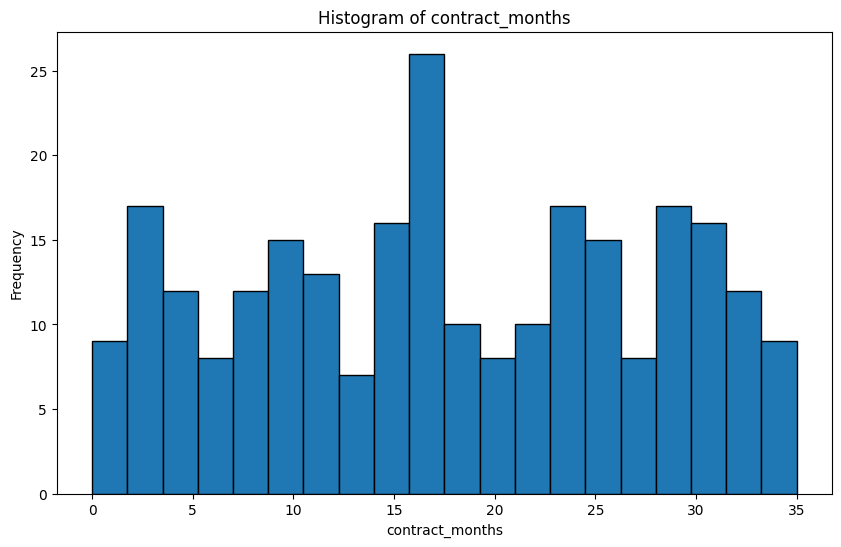

In [108]:
#visualization of data using histogram
plt.figure(figsize=(10, 6))
plt.hist(df['contract_months'], bins=20, edgecolor='black')
plt.title('Histogram of contract_months')
plt.xlabel('contract_months')
plt.ylabel('Frequency')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

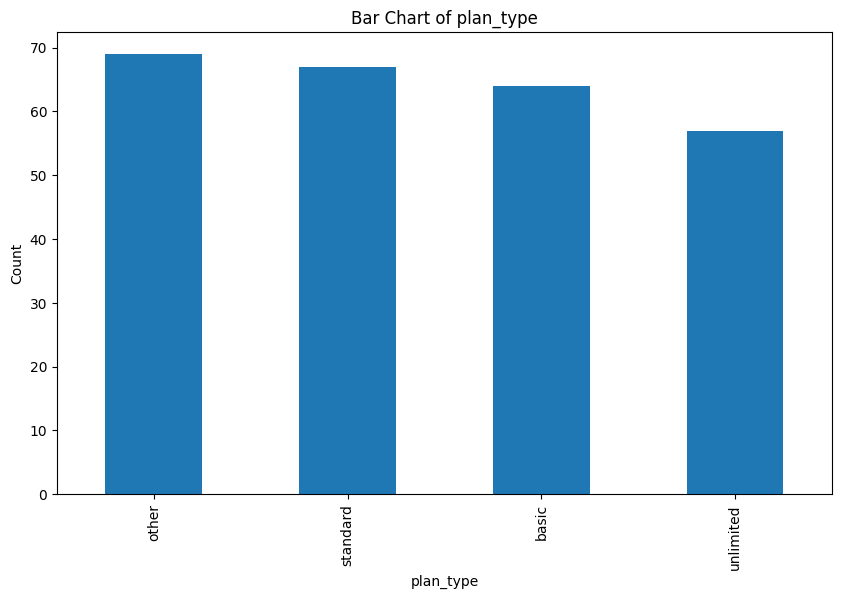

In [110]:
#visualization of data using bar chart
plt.figure(figsize=(10, 6))
df['plan_type'].value_counts().plot(kind='bar')
plt.title('Bar Chart of plan_type')
plt.xlabel('plan_type')
plt.ylabel('Count')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

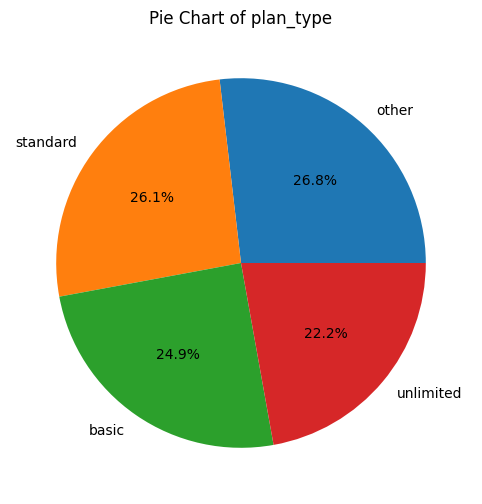

In [112]:
#visualization usin pie chart
plt.figure(figsize=(10, 6))
df['plan_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of plan_type')
plt.ylabel('')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

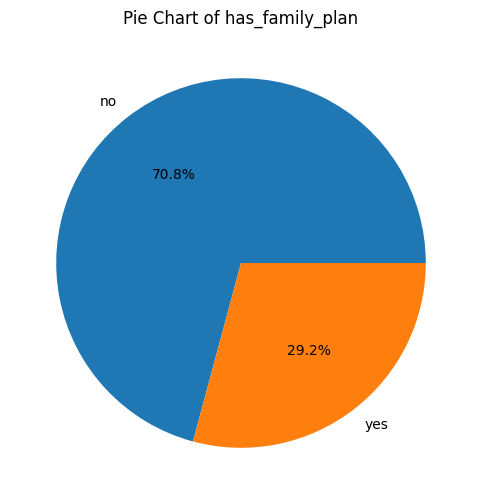

In [113]:
#visulalization using pie chart
plt.figure(figsize=(10, 6))
df['has_family_plan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of has_family_plan')
plt.ylabel('')
plt

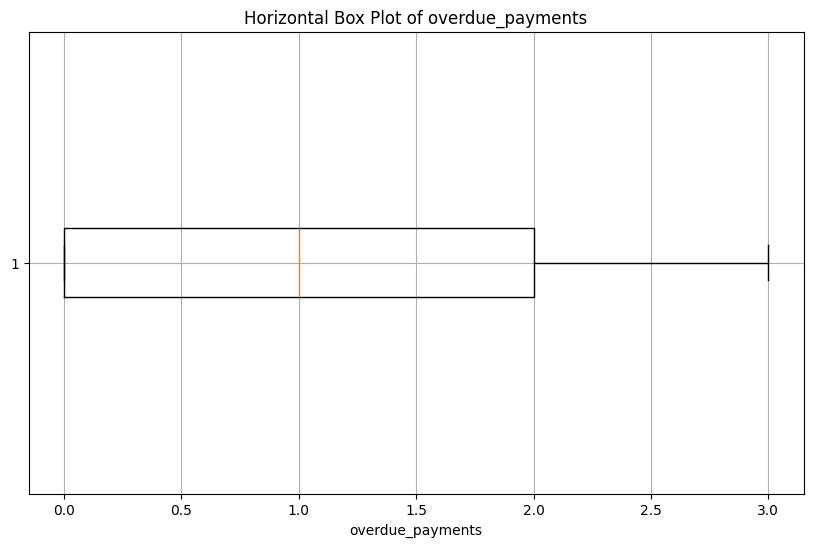

In [115]:
#visualization using horizontal box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['overdue_payments'], vert=False)
plt.title('Horizontal Box Plot of overdue_payments')
plt.xlabel('overdue_payments')
plt.grid(True)


Outliers removed for 'monthly_minutes'.
Outliers removed for 'monthly_data_mb'.
Outliers removed for 'monthly_sms'.
Outliers removed for 'contract_months'.
Outliers removed for 'overdue_payments'.


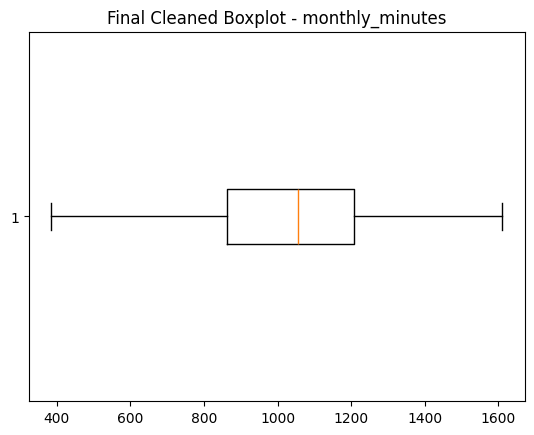

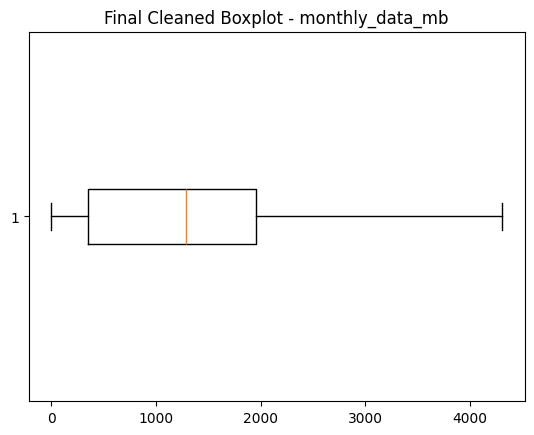

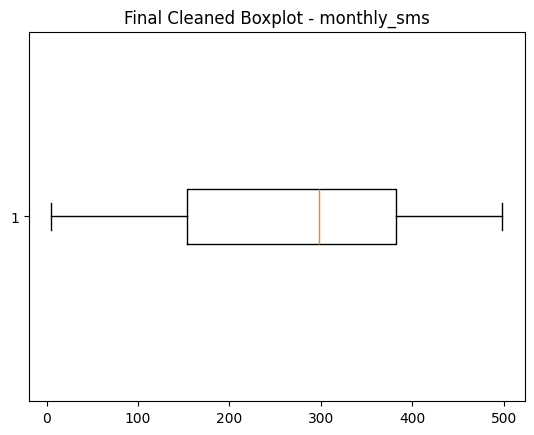

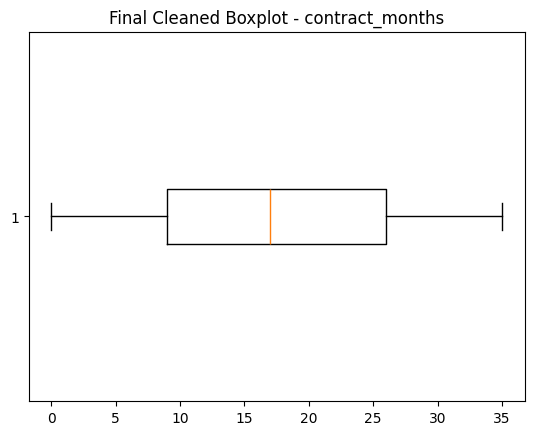

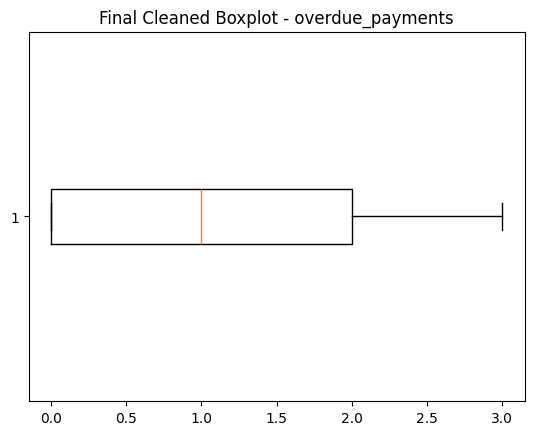

In [118]:
#outlier detection and correction

def outlier_detection(data):
    sorted_data = sorted(data)
    Q1 = np.percentile(sorted_data, 25)
    Q3 = np.percentile(sorted_data, 75)
    IQR = Q3 - Q1
    LR = Q1 - 1.5 * IQR
    UR = Q3 + 1.5 * IQR
    return LR, UR


numeric_columns = [
    "monthly_minutes",
    "monthly_data_mb",
    "monthly_sms",
    "contract_months",
    "overdue_payments"
]


for col in numeric_columns:


    cleaned_data = df[col].dropna().tolist()


    while True:
        LR, UR = outlier_detection(cleaned_data)
        outliers = [x for x in cleaned_data if x < LR or x > UR]

        if not outliers:
            break

        print(f"Lower Range: {LR:.2f}, Upper Range: {UR:.2f}")
        print(f"Outliers found: {outliers}")

        cleaned_data = [x for x in cleaned_data if x >= LR and x <= UR]

        plt.boxplot(cleaned_data, vert=False)
        plt.title(f"{col} (After removing {len(outliers)} outliers)")
        plt.show()


    df = df[df[col].isin(cleaned_data)]

    print(f"Outliers removed for '{col}'.")


for col in numeric_columns:
    plt.boxplot(df[col], vert=False)
    plt.title(f"Final Cleaned Boxplot - {col}")
    plt.show()